<a href="https://colab.research.google.com/github/DRodriguez615/Projects/blob/master/_ACTIVESATELLITES_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()
uploaded

In [0]:
# had to convert file to csv
data_xls = pd.read_excel('UCS-Satellite-Database-10-1-19.xlsx')
data_xls.to_csv('UCS-Satellite-Database-10-1-19.csv', index=None, header=True)

In [252]:
# took away columns with missing values
df = pd.read_csv('UCS-Satellite-Database-10-1-19.csv', usecols=[0,1,2,3,4,5,7,10,11,12,13,14,18,19,20,21,22,23,24,25])
print(df.shape)
df

(2218, 20)


,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Class of Orbit,Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,LEO,476,500,0.001750,97.40,95.00,2018-11-29,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,LEO,497,517,0.001454,97.45,94.70,2017-06-23,2.0,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,442,687,0.017665,98.20,95.90,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35778,35793,0.000178,0.08,1436.03,2014-02-06,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,35700,35700,0.000000,0.00,1436.10,2016-06-15,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,Zhuhai-1-03 (OVS-3),NR (11/19),China,Zhuhai Orbita Control Engineering Co. Ltd.,Commercial,Earth Observation,LEO,494,511,0.001237,97.40,94.60,2019-09-19,NaN,Zhuhai Orbita Control Engineering Co. Ltd.,China,Jiuquan Satellite Launch Center,Long March 11,2019-060A,44534
2214,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,763,773,0.000700,98.56,100.20,2011-12-22,NaN,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2011-079A,38038
2215,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,748,758,0.000702,98.50,99.80,2019-09-14,5.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2019-059A,44528
2216,Ziyuan 3 (ZY-3),China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,500,504,0.000291,97.50,94.70,2012-01-09,4.0,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B,2012-001A,38046


In [253]:
df.dtypes

Name of Satellite, Alternate Names     object
Country/Org of UN Registry             object
Country of Operator/Owner              object
Operator/Owner                         object
Users                                  object
Purpose                                object
Class of Orbit                         object
Perigee (km)                            int64
Apogee (km)                             int64
Eccentricity                          float64
Inclination (degrees)                 float64
Period (minutes)                      float64
Date of Launch                         object
Expected Lifetime (yrs.)              float64
Contractor                             object
Country of Contractor                  object
Launch Site                            object
Launch Vehicle                         object
COSPAR Number                          object
NORAD Number                            int64
dtype: object

In [254]:
# couldnt get dropna() to work so just replaced missing values in this column with 0 
df['Expected Lifetime (yrs.)'] = df['Expected Lifetime (yrs.)'].fillna(0)
df.isnull().sum()

Name of Satellite, Alternate Names    0
Country/Org of UN Registry            0
Country of Operator/Owner             0
Operator/Owner                        0
Users                                 0
Purpose                               0
Class of Orbit                        0
Perigee (km)                          0
Apogee (km)                           0
Eccentricity                          0
Inclination (degrees)                 0
Period (minutes)                      0
Date of Launch                        0
Expected Lifetime (yrs.)              0
Contractor                            0
Country of Contractor                 0
Launch Site                           0
Launch Vehicle                        0
COSPAR Number                         0
NORAD Number                          0
dtype: int64

Number of Satellites: 2218


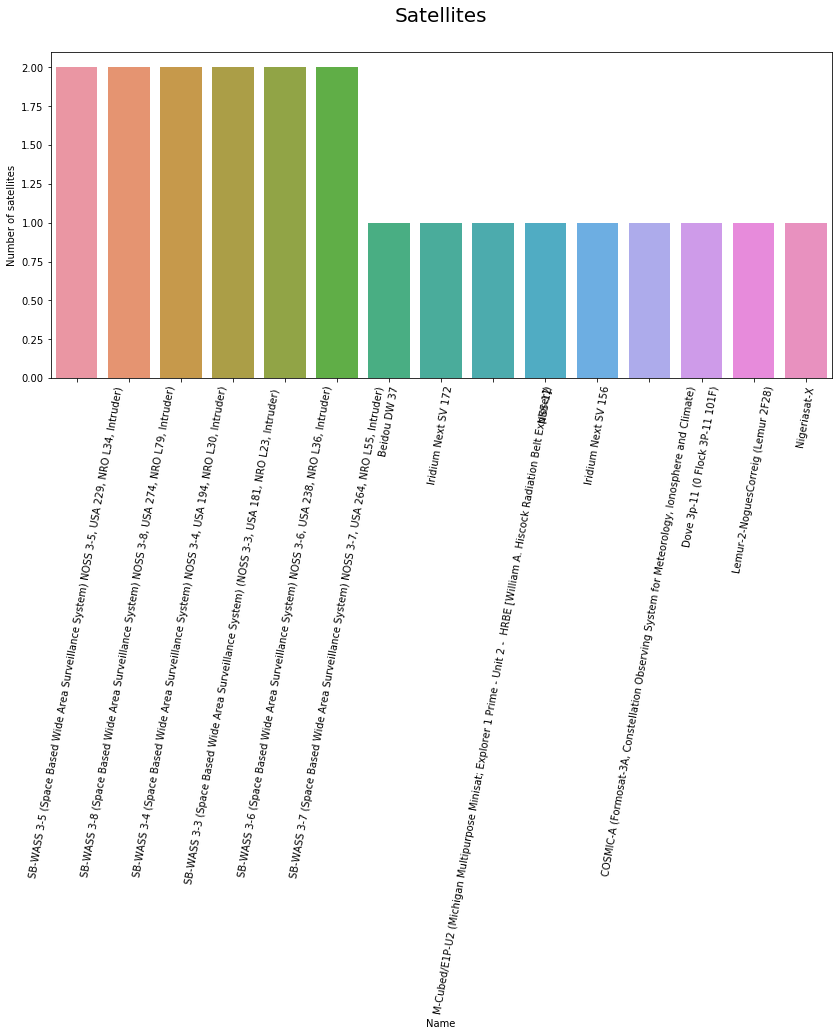

In [255]:
print('Number of Satellites:',df['Name of Satellite, Alternate Names'].value_counts().sum())
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(df['Name of Satellite, Alternate Names'], order = df['Name of Satellite, Alternate Names'].value_counts().head(15).index)
plt.xticks(rotation=80)
plt.title("Satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Name")
plt.ylabel("Number of satellites")
plt.show()

In [395]:
# checking how many satellites each company/operator has
df['Operator/Owner']

0                    Universitat Politècnica de Catalunya
1                                     University of Aalto
2                                   University of Aalborg
3                           Asia Broadcast Satellite Ltd.
4                           Asia Broadcast Satellite Ltd.
                              ...                        
2213           Zhuhai Orbita Control Engineering Co. Ltd.
2214    China Centre for Resources Satellite Data and ...
2215    China Centre for Resources Satellite Data and ...
2216    China Centre for Resources Satellite Data and ...
2217    China Centre for Resources Satellite Data and ...
Name: Operator/Owner, Length: 2218, dtype: object

Number of Operators/Owners: 515


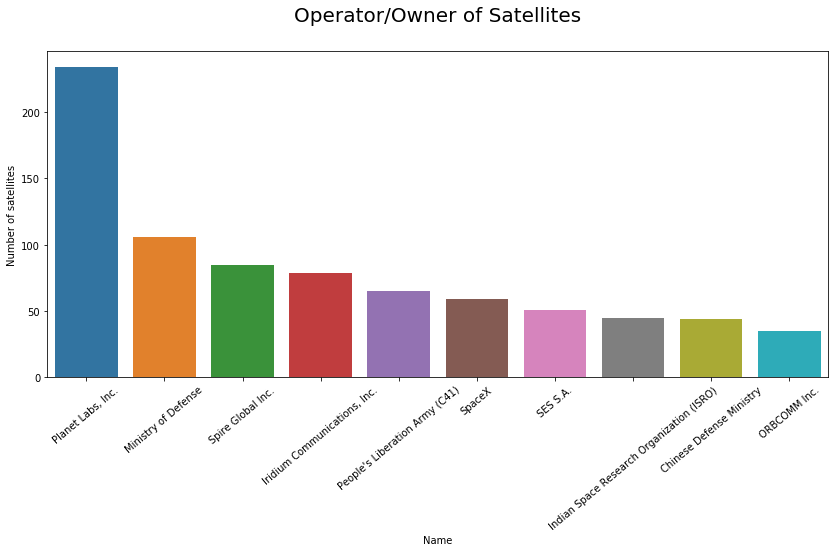

In [259]:
# operators/owners
print('Number of Operators/Owners:', 515)
fig, ax = plt.subplots(figsize=(14,6))
operators= sns.countplot(df['Operator/Owner'], order = df['Operator/Owner'].value_counts().head(10).index)
plt.xticks(rotation=40) #changing angle of xlabels to read easier
plt.title("Operator/Owner of Satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Name")
plt.ylabel("Number of satellites")
plt.savefig('operators.png')
plt.show()

In [303]:
# will mostly use the top 5 countries for visuals
df['Country of Operator/Owner'].value_counts().head(10)

USA               988
China             320
Russia            161
Japan              78
Multinational      64
United Kingdom     63
India              57
ESA                50
Canada             39
Germany            36
Name: Country of Operator/Owner, dtype: int64

Number of Countries of Operators/Owners: 99


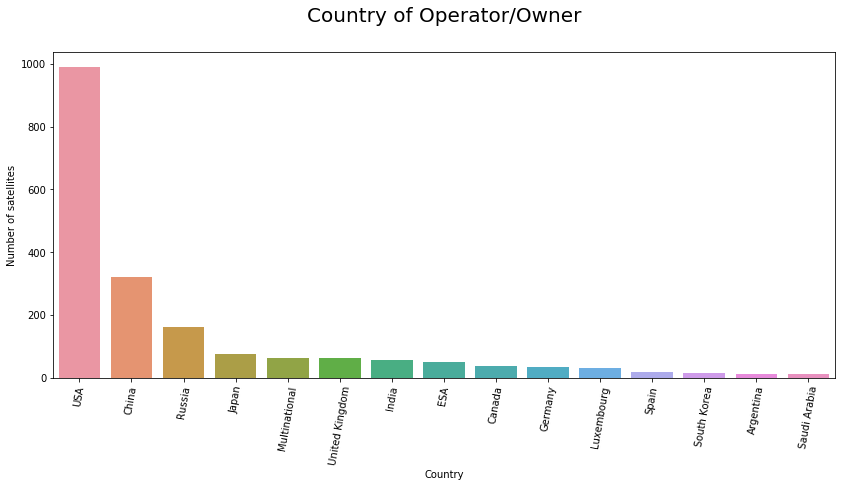

In [261]:
# country of operator/owner
print('Number of Countries of Operators/Owners:',df['Country of Operator/Owner'].describe()[1])# printing unique values
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(df['Country of Operator/Owner'], order = df['Country of Operator/Owner'].value_counts().head(15).index)
plt.xticks(rotation=80)
plt.title("Country of Operator/Owner", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Country")
plt.ylabel("Number of satellites")
plt.show()

In [312]:
# checking to see where each company is based out of
Country_owner = pd.crosstab(df['Country of Operator/Owner'], df['Operator/Owner'])
Country_Owner = pd.DataFrame(Country_owner)
Country_Owner

Operator/Owner,1Worldspace,AISTech,AMSAT-NA,AMSAT-NA/University of Iowa/Penn State Erie/Virginia Tech,AMSAT-UK,APT Satellite Holdings Ltd.,Aalto University,Aarhus University,Aerospace Corporation,AgilSpace,Air Force Research Laboratory,Air Force Research Laboratory (AFRL),Air Force Research Laboratory (AFRL)/Swedish Defense Materiel Administration,Air Force Satellite Control Network,Airbus,Al Yah Satellite Communications Co. (YAHSAT),Al-Farabi Kazakh National University,Algerian Space Agency (ASAL),Algerian Space Agency (ASAL)/UK Space Agency,Alibaba,Analytical Space,Applied Physics Laboratory/NASA,Aprize Satellite,Aprize Satellite Argentina,ArSat,Arab Satellite Communications Org. (ASCO),"Argentinian Ministry of Science, Technology and Productive Innovation/Radio Club Bariloche",Armed Forces,Asia Broadcast Satellite Ltd.,Asia Satellite Telecommunications Co. Ltd.,Astranis,Astro Digital,Astro Live Experiences,Astro Space Center of Moscow/Russian Academy of Sciences,Astrocast,Astronautic Technology Sdn. Bhd (ATSB),Astrotech SOHLA,"Avanti Communications, PLC",Axelspace,Azercosmos,...,University of Florida,University of Illinois Urbana-Champaign,University of Iowa,University of Michigan/Montana University,University of Michigan/NASA Earth Science Technology Office,University of Montpellier,University of North Carolina - Wilmington,University of Rome,University of Science and Technology,University of Southern Indiana/NASA,University of Stuttgart,University of Texas - Austin,University of Tokyo and NESTRA,"University of Toronto, Institute for Aerospace Studies",University of Vigo/Alén Space,University of Wuerzburg,University of Würzburg,University of the Philippines,Unknown,Unknown US agency,Unknown US intelligence agency,UnseenLabs,Vanderbilt University/AMSAT,Ventspils University College,"ViaSat, Inc.",Vietnam National Space Center,Vietnamese Posts and Telecommunications Group (VNPT),Wakayama University (UNIFORM consortium),Warsaw University of Technology,"Weathernews, Inc.",West Virginia University,WildBlue Communications,Wuhan University,XM Satellite Radio USA,Xinwei Telecom Technology Company,Zhejiang University,Zhuhai Orbita Aerospace Science and Technology Co.,Zhuhai Orbita Control Engineering Co. Ltd.,exactEarth,iSky Technology
Country of Operator/Owner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Azerbaijan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
United Kingdom/ESA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [596]:
# trying to figure out how to show only columns with values
# will come back and work on more
# wont use for visual                  #filtered countries using iloc
# top 5 countries and top 10 operators/owners
top5C = Country_Owner.iloc[[83, 13, 66, 44, 56],[353,263,410,220,350,406,368,201,96,335]] #95, 36, 21, 11, 33, 51, 74, 73, 1, 69, 2, 58, 42, 27, 79, 43]]
top5C

Operator/Owner,"Planet Labs, Inc.",Ministry of Defense,Spire Global Inc.,"Iridium Communications, Inc.",People's Liberation Army (C41),SpaceX,SES S.A.,Indian Space Research Organization (ISRO),Chinese Defense Ministry,ORBCOMM Inc.
Country of Operator/Owner,,,,,,,,,,
USA,234,0,85,79,0,59,12,0,0,35
China,0,0,0,0,65,0,0,0,44,0
Russia,0,95,0,0,0,0,0,0,0,0
Japan,0,1,0,0,0,0,0,0,0,0
Multinational,0,0,0,0,0,0,0,0,0,0


In [264]:
# only 4 main users
# others based off the main 4
df['Users'].value_counts()

Commercial                        1033
Government                         419
Military                           331
Civil                              151
Government/Commercial              112
Military/Commercial                 75
Military/Government                 49
Government/Civil                    28
Government/Military                  5
Military/Civil                       5
Civil/Government                     3
Commercial/Military                  2
Military                             1
Commercial/Government                1
Commercial                           1
Government/Commercial/Military       1
Civil/Military                       1
Name: Users, dtype: int64

Number of users: 17
Number of Main users: 4


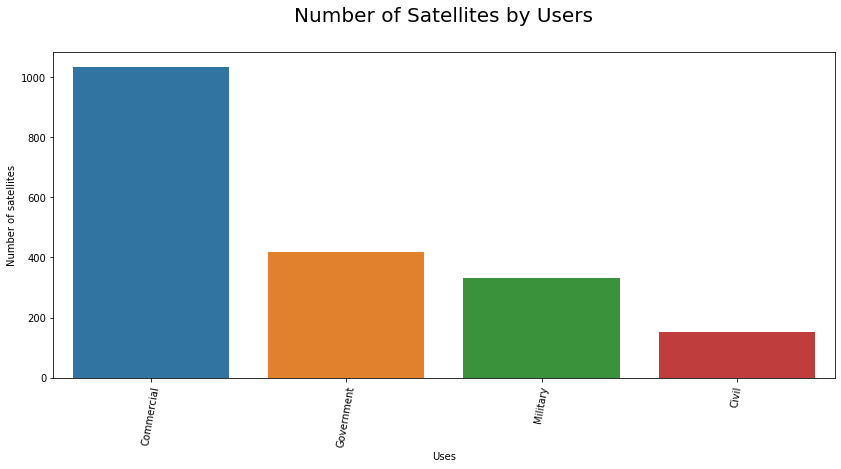

In [265]:
# users
print('Number of users:',df['Users'].describe()[1])
print('Number of Main users:',4)
fig, ax = plt.subplots(figsize=(14,6))
users = sns.countplot(df['Users'], order = df['Users'].value_counts().head(4).index)
plt.xticks(rotation=80)
plt.title("Number of Satellites by Users", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Uses")
plt.ylabel("Number of satellites")
plt.savefig('users.png')
plt.show()

In [266]:
df['Class of Orbit'].value_counts()

LEO           1468
GEO            562
MEO            132
Elliptical      56
Name: Class of Orbit, dtype: int64

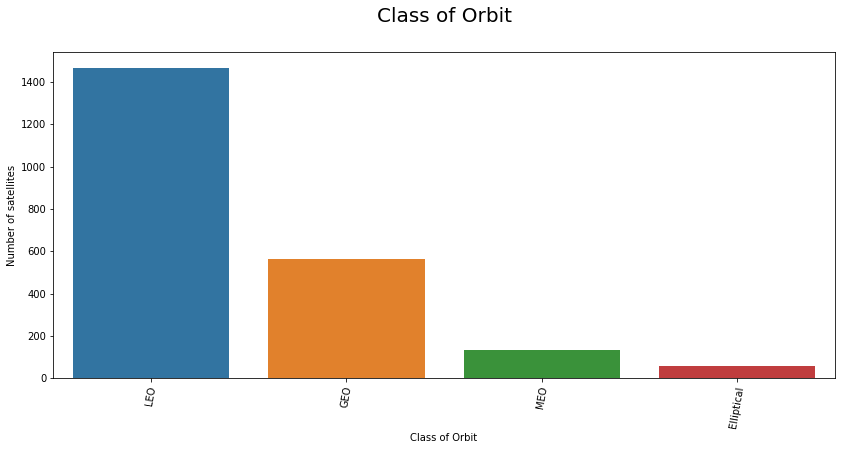

In [267]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(df['Class of Orbit'], order = df['Class of Orbit'].value_counts().index)
plt.xticks(rotation=80)
plt.title("Class of Orbit", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Class of Orbit")
plt.ylabel("Number of satellites")
plt.show()

In [268]:
# looking to see if there is any significance within the types of orbits and their purpose
orbit_purpose = pd.crosstab(df['Class of Orbit'], df['Purpose'])
orbit_purpose = pd.DataFrame(orbit_purpose)
orbit_purpose


Purpose,Communications,Communications/Maritime Tracking,Communications/Navigation,Communications/Technology Development,Earth Observation,Earth Observation,Earth Observation/Communications,Earth Observation/Communications/Space Science,Earth Observation/Earth Science,Earth Observation/Space Science,Earth Observation/Technology Development,Earth Science,Earth Science/Earth Observation,Educational,Navigation/Global Positioning,Navigation/Regional Positioning,Space Observation,Space Science,Space Science/Technology Development,Surveillance,Technology Demonstration,Technology Development,Technology Development/Education,Technology Development/Educational
Class of Orbit,,,,,,,,,,,,,,,,,,,,,,,,
Elliptical,11,0,0,0,10,0,0,0,0,0,0,0,0,0,2,0,0,20,0,0,0,13,0,0
GEO,473,0,1,1,41,0,1,0,0,0,0,0,0,0,18,12,4,1,0,0,0,10,0,0
LEO,324,5,0,7,771,4,1,1,1,1,7,15,1,1,0,0,5,60,1,3,8,249,2,1
MEO,21,0,0,0,0,0,0,0,0,0,0,0,0,0,110,0,0,0,0,0,0,1,0,0


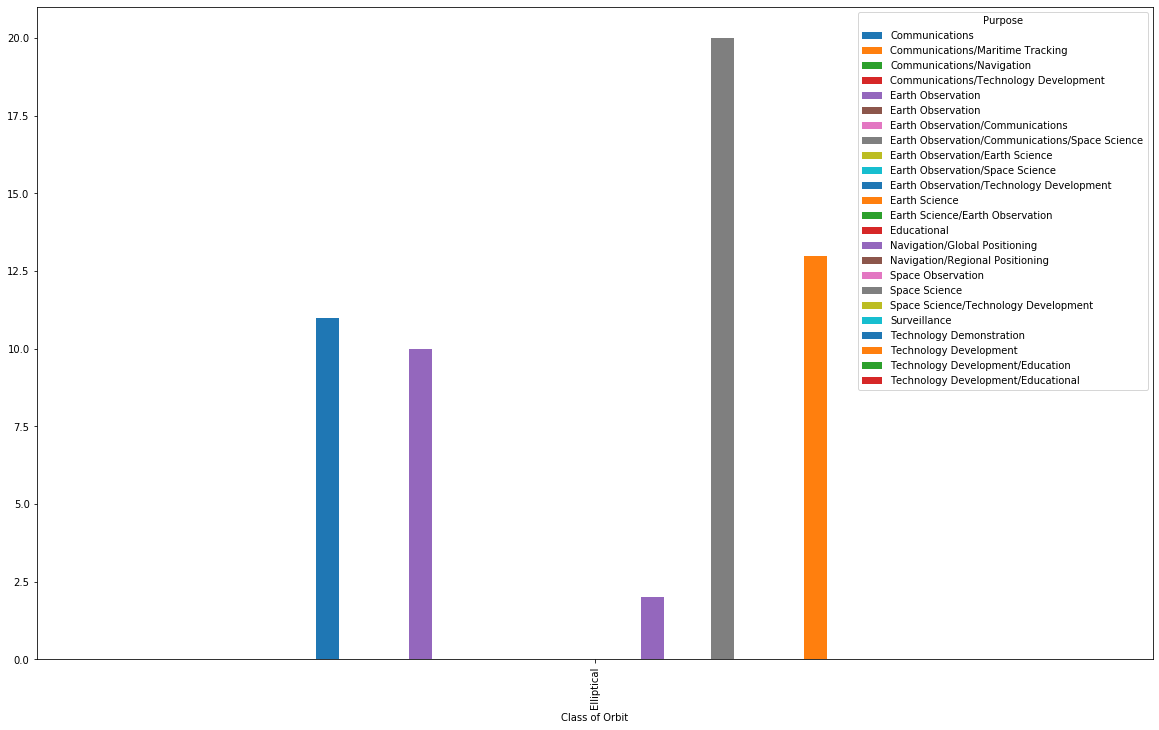

In [269]:
# Elliptical satellites
orbit_purpose.iloc[0:1].plot(kind='bar', figsize=(20,12)); #made figsize big to move legend out of the way a little

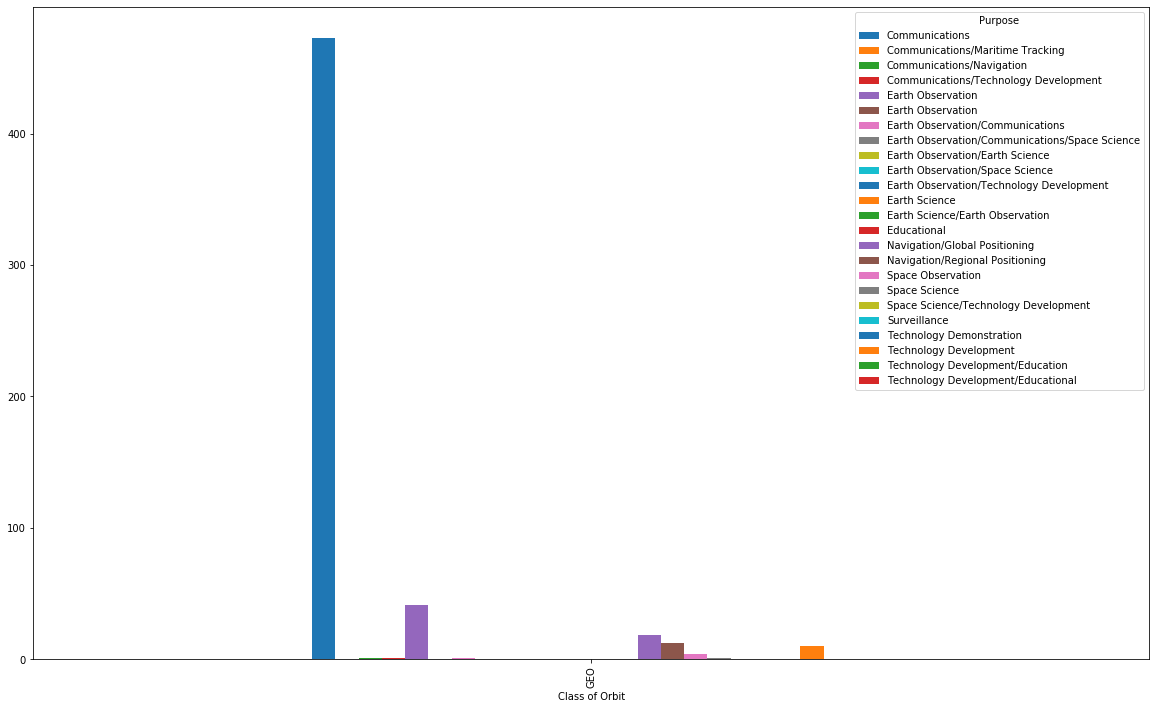

In [270]:
# Geo orbit satellites
orbit_purpose.iloc[1:2].plot(kind='bar', figsize=(20,12));#made figsize big to move legend out of the way a little

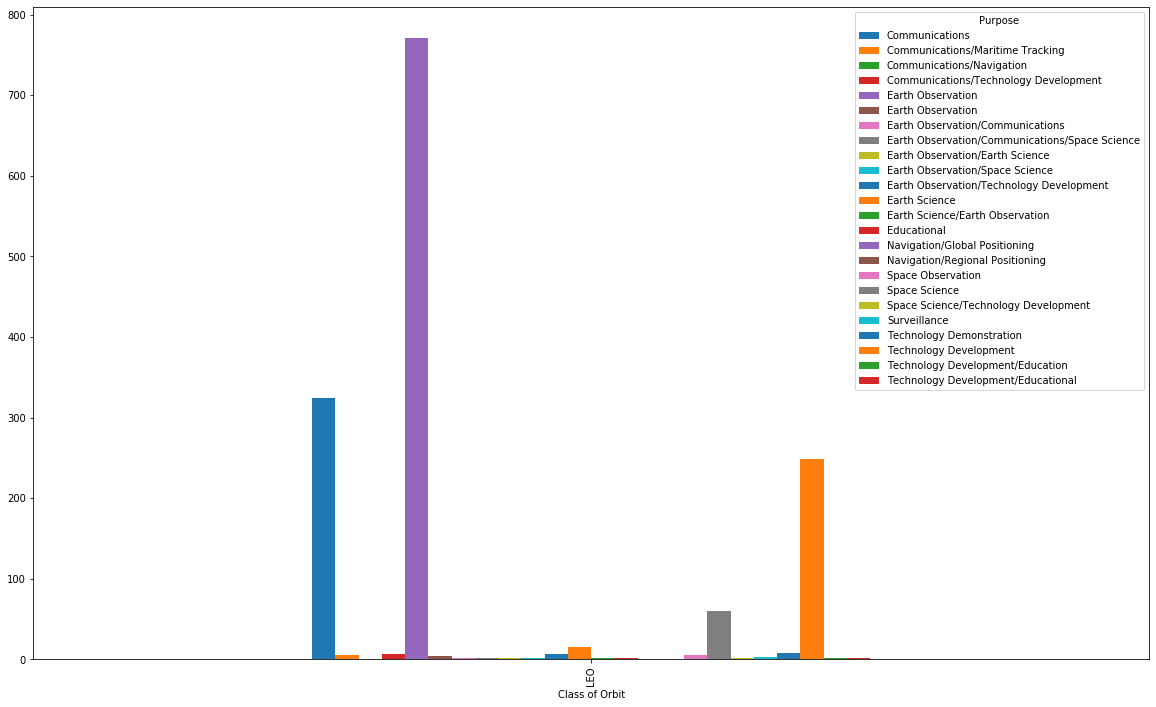

In [271]:
# LEO orbit satellites
orbit_purpose.iloc[2:3].plot(kind='bar', figsize=(20,12));#made figsize big to move legend out of the way a little

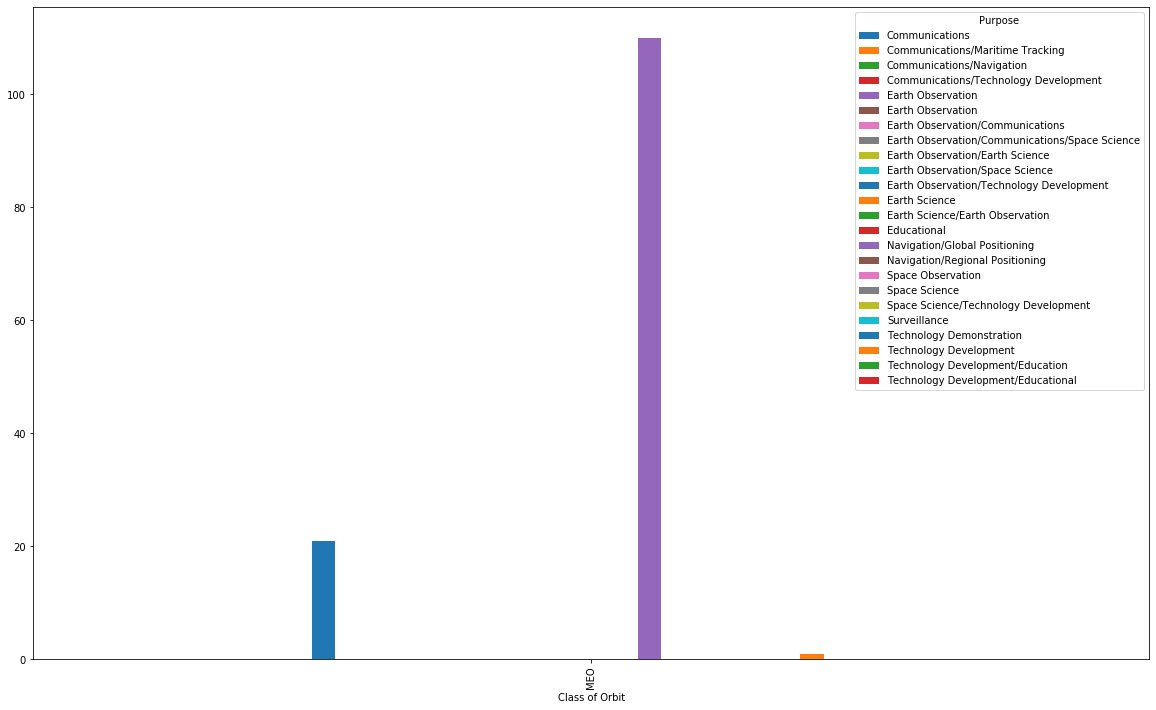

In [272]:
# MEO orbit satellites
orbit_purpose.iloc[3:4].plot(kind='bar', figsize=(20,12));#made figsize big to move legend out of the way a little

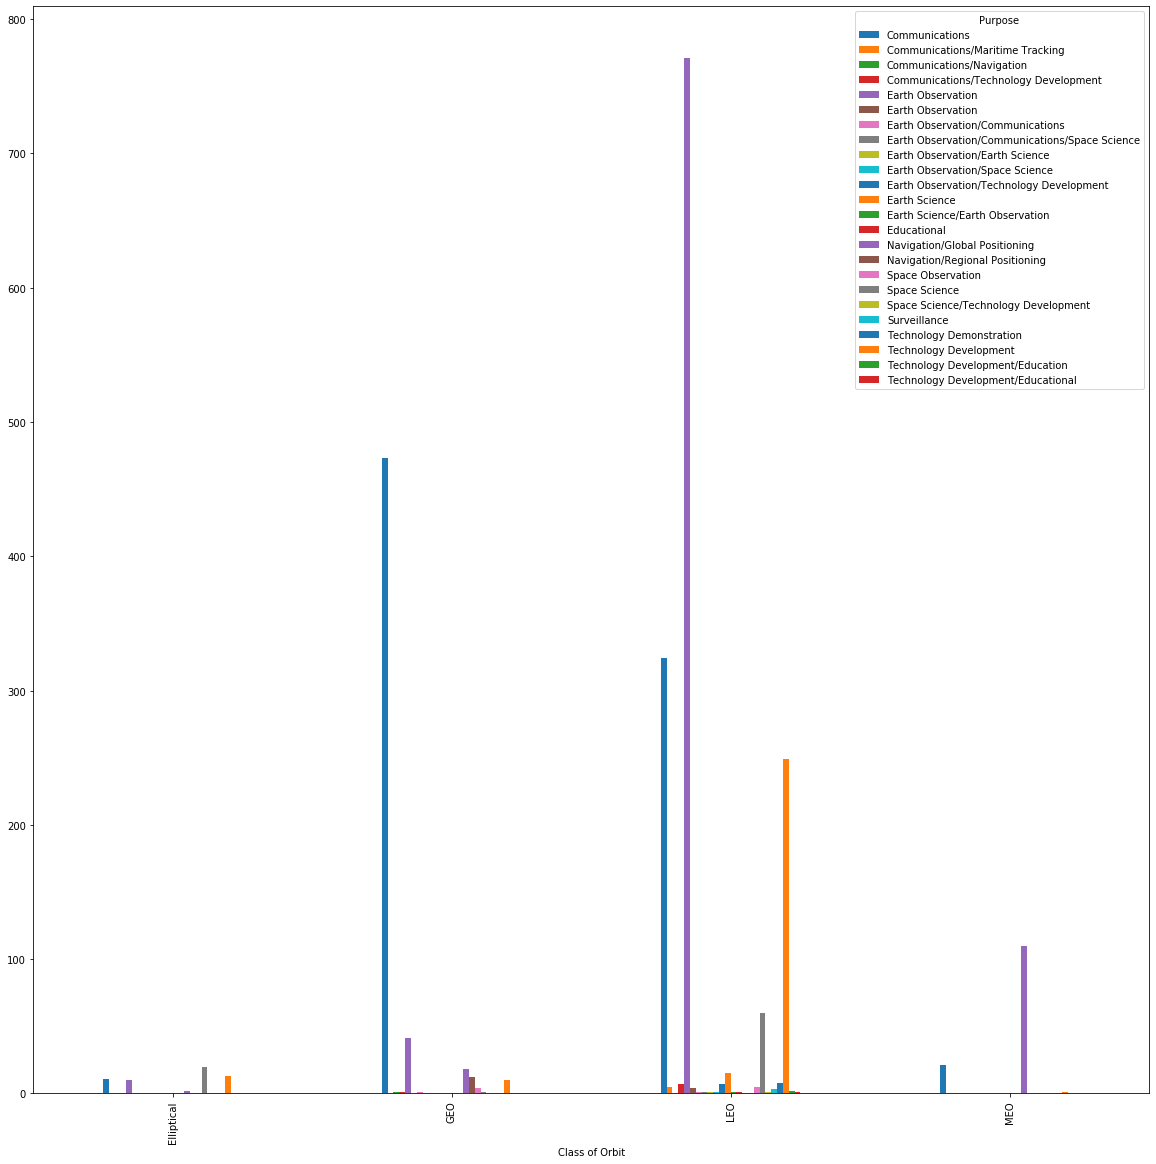

In [273]:
orbit_purpose.plot(kind='bar', figsize=(20,20));#made figsize big to move legend out of the way a little

In [274]:

orbit_lifetime = pd.crosstab(df['Class of Orbit'], df['Expected Lifetime (yrs.)'])
orbit_lifetime = orbit_lifetime.iloc[:, 1:]
orbit_lifetime

Expected Lifetime (yrs.),0.25,0.50,1.00,1.50,2.00,2.50,3.00,4.00,4.50,5.00,6.00,7.00,7.25,8.00,9.00,10.00,11.00,12.00,12.50,13.00,14.00,14.50,15.00,16.00,17.00,18.00,20.00,25.00,30.00
Class of Orbit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Elliptical,0,0,2,0,4,0,4,4,0,2,0,3,0,1,0,3,0,2,0,0,0,0,3,0,0,0,1,0,0
GEO,0,0,0,0,0,0,1,4,0,8,0,8,0,22,3,24,5,56,2,18,18,1,298,6,1,10,3,0,0
LEO,3,4,22,3,37,1,70,12,1,166,4,38,2,19,2,24,2,1,0,0,0,0,100,0,0,0,0,1,1
MEO,0,0,1,0,0,0,0,0,0,0,0,25,0,26,0,27,0,30,0,0,0,0,2,0,0,0,0,0,0


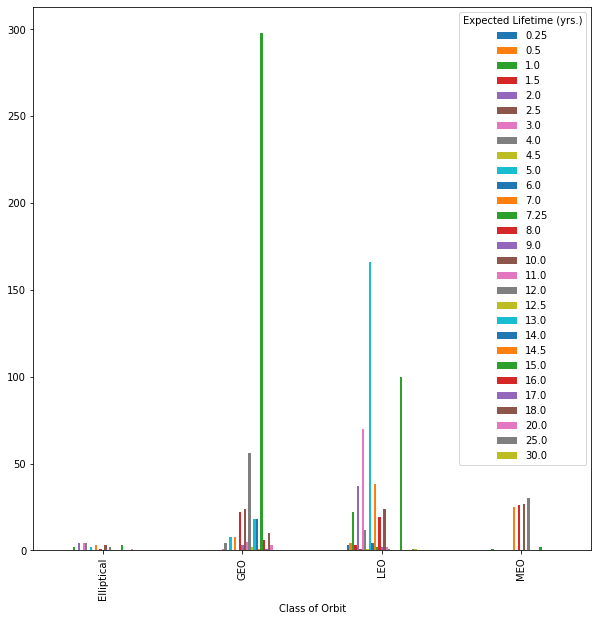

In [275]:
orbit_lifetime.plot(kind='bar', figsize=(10,10));

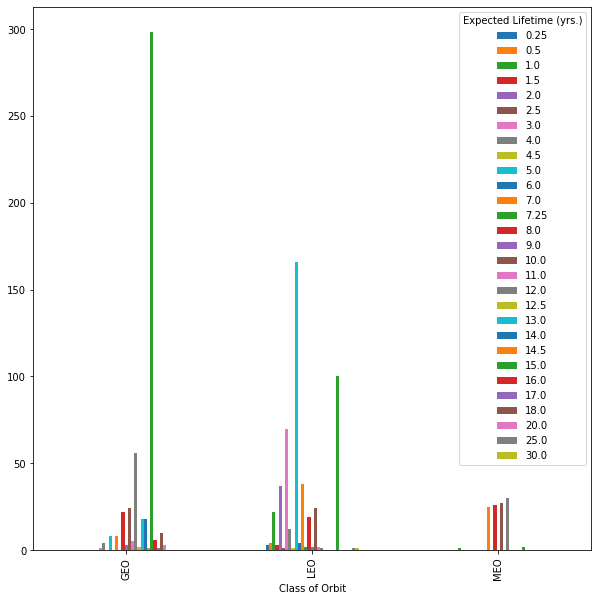

In [276]:
# GEO has the most 15year satellites
# LEO has the most 5year satellites
# MEO has the most 8 and 10 year satellites by only 4more at the most
orbit_lifetime.sort_index()[1:].plot(kind='bar', figsize=(10,10));

In [277]:
# satellites by country and their orbit types
Country_orbit = pd.crosstab(df['Country of Operator/Owner'], df['Class of Orbit'])
Country_orbit = pd.DataFrame(Country_orbit)
Country_orbit.iloc[[83, 13, 66, 44, 56]]

Class of Orbit,Elliptical,GEO,LEO,MEO
Country of Operator/Owner,,,,
USA,31,183,740,34
China,1,60,233,26
Russia,7,31,95,28
Japan,2,27,49,0
Multinational,5,52,7,0


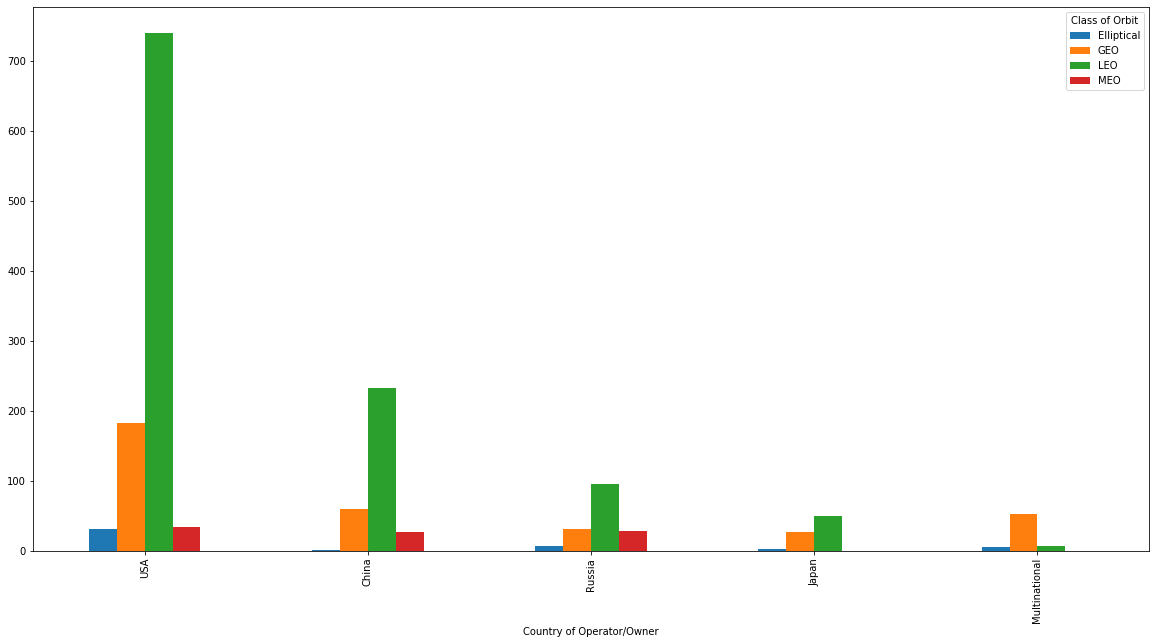

In [278]:
# top 21 countries with the most satellites and their class of orbit
# taking top 5 countries using iloc below
top21 = Country_orbit.iloc[[83, 13, 66, 44, 56]] #95, 36, 21, 11, 33, 51, 74, 73, 1, 69, 2, 58, 42, 27, 79, 43]]
top21.plot(kind='bar', figsize=(20,10));

In [279]:
# note the 1077 satellites that had missing values are all under 0yrs(ignore)
df['Expected Lifetime (yrs.)'].value_counts()[1:].sort_index() # instead of dropping and losing satellites i just replaced their lifetime value with 0 and skipped the row for 0years

0.25      3
0.50      4
1.00     25
1.50      3
2.50      1
4.00     20
4.50      1
6.00      4
7.25      2
9.00      5
11.00     7
12.50     2
13.00    18
14.00    18
14.50     1
16.00     6
17.00     1
18.00    10
20.00     4
25.00     1
30.00     1
Name: Expected Lifetime (yrs.), dtype: int64

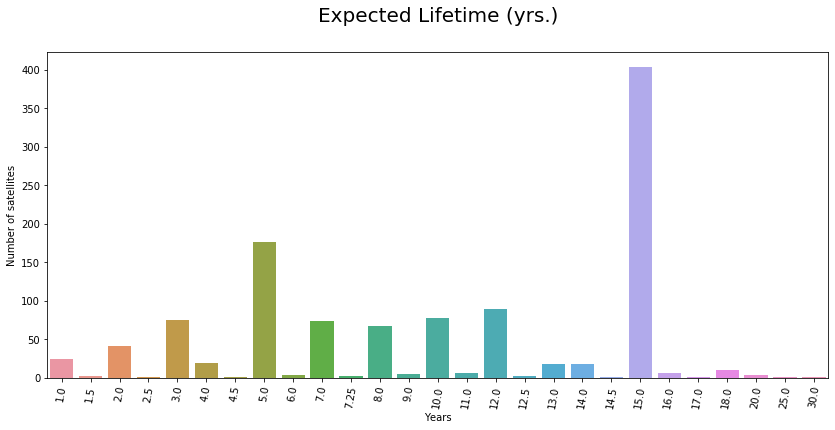

In [280]:
# expected lifetime of satellites in years
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(df['Expected Lifetime (yrs.)'], order = df['Expected Lifetime (yrs.)'].value_counts().sort_index()[1:].index)
plt.xticks(rotation=80)
plt.title("Expected Lifetime (yrs.)", fontdict = {'fontsize':20}, pad=30)
plt.xlabel("Years")
plt.ylabel("Number of satellites")
plt.show()

In [281]:
# each countries satellite lifetimes
country_lifetime = pd.crosstab(df['Country of Operator/Owner'], df['Expected Lifetime (yrs.)'])
Country_lifetime = pd.DataFrame(country_lifetime)
Country_lifetime = Country_lifetime.iloc[:, 1:] #take away first column with 0years
Country_lifetime

Expected Lifetime (yrs.),0.25,0.50,1.00,1.50,2.00,2.50,3.00,4.00,4.50,5.00,6.00,7.00,7.25,8.00,9.00,10.00,11.00,12.00,12.50,13.00,14.00,14.50,15.00,16.00,17.00,18.00,20.00,25.00,30.00
Country of Operator/Owner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Azerbaijan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0
United Kingdom,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,3,0,0,0,4,0,0,13,0,0,0,0,0,0
United Kingdom/ESA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [282]:
top_5 = Country_lifetime.iloc[[83, 13, 66, 44, 56]]
top_5

Expected Lifetime (yrs.),0.25,0.50,1.00,1.50,2.00,2.50,3.00,4.00,4.50,5.00,6.00,7.00,7.25,8.00,9.00,10.00,11.00,12.00,12.50,13.00,14.00,14.50,15.00,16.00,17.00,18.00,20.00,25.00,30.00
Country of Operator/Owner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
USA,3,2,6,0,10,0,19,7,0,57,1,3,1,4,5,49,4,21,2,11,15,0,177,3,1,5,3,1,0
China,0,0,0,0,3,0,20,3,0,3,0,1,0,60,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0
Russia,0,0,1,0,0,0,17,0,0,34,0,40,0,0,0,6,1,4,0,0,0,0,14,0,0,0,0,0,0
Japan,0,0,6,1,5,0,2,0,0,15,0,2,0,2,0,0,1,1,0,1,0,1,16,0,0,0,0,0,0
Multinational,0,0,0,0,5,0,1,0,0,4,0,1,0,0,0,0,0,7,0,2,0,0,40,1,0,0,0,0,1


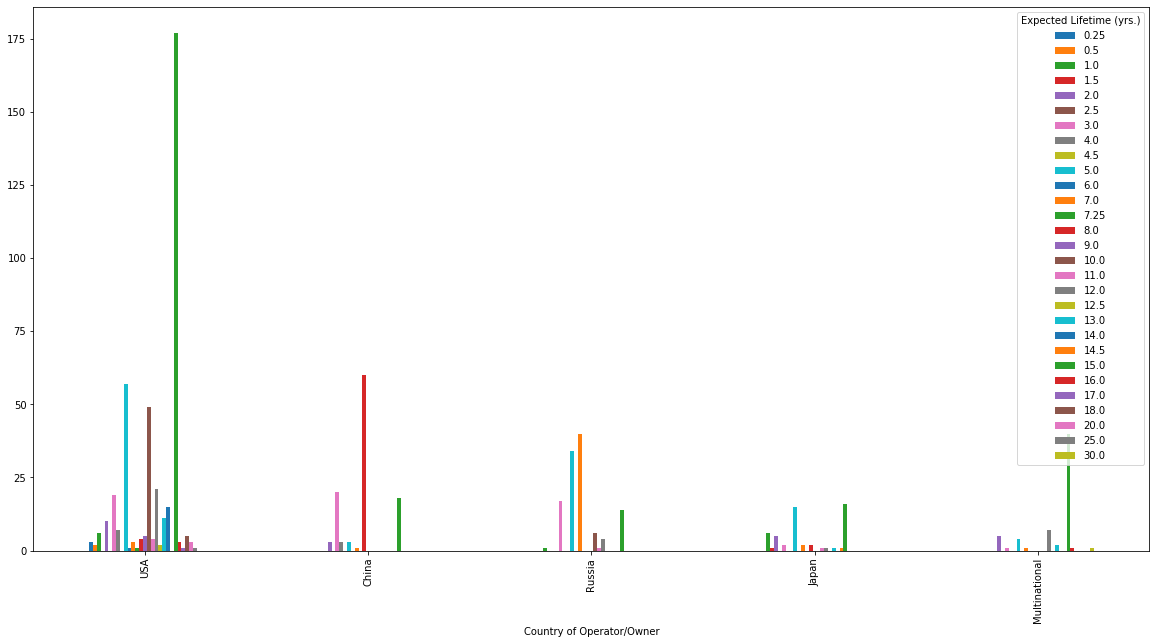

In [283]:
# top 5 countries with most satellites and their satellite lifetimes
top_5 = Country_lifetime.iloc[[83, 13, 66, 44, 56]]
top_5.plot(kind='bar', figsize=(20,10));

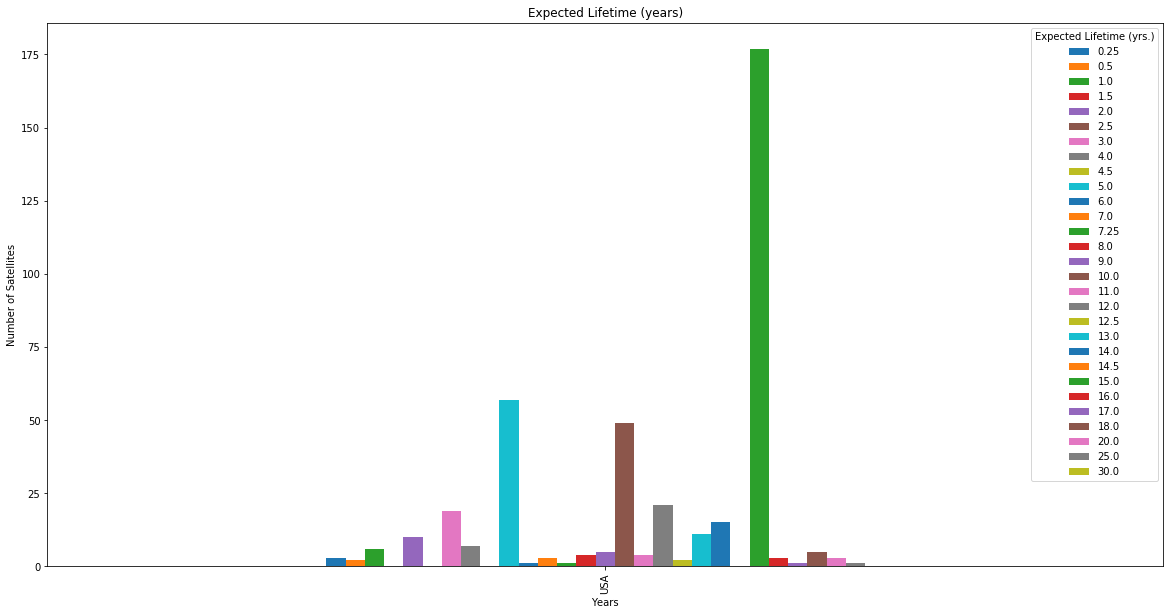

In [284]:
# years start from left to right .25-30years
# need to go back and add xticks
USA = Country_lifetime.iloc[[83]]
USA.plot(kind='bar', figsize=(20,10))
plt.title('Expected Lifetime (years)')
plt.ylabel('Number of Satellites')
plt.xlabel('Years');

In [285]:
# trying to see which companies have the longest lasting satellites
company_lifetime = pd.crosstab(df['Operator/Owner'], df['Expected Lifetime (yrs.)'])
Company_lifetime = pd.DataFrame(company_lifetime)
Company_lifetime

Expected Lifetime (yrs.),0.00,0.25,0.50,1.00,1.50,2.00,2.50,3.00,4.00,4.50,5.00,6.00,7.00,7.25,8.00,9.00,10.00,11.00,12.00,12.50,13.00,14.00,14.50,15.00,16.00,17.00,18.00,20.00,25.00,30.00
Operator/Owner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1Worldspace,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
AISTech,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AMSAT-NA,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
AMSAT-NA/University of Iowa/Penn State Erie/Virginia Tech,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AMSAT-UK,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhejiang University,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zhuhai Orbita Aerospace Science and Technology Co.,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zhuhai Orbita Control Engineering Co. Ltd.,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [286]:
# making dates plottable
df['Date'] = pd.to_datetime(df['Date of Launch'])
df['year'], df['month'] = df['Date'].dt.year, df['Date'].dt.month
dates = df.groupby('Date').Date.count()
dates 

Date
1974-11-15    1
1988-09-29    1
1989-09-25    1
1990-04-25    1
1990-08-30    1
             ..
2019-09-12    1
2019-09-14    1
2019-09-19    5
2019-09-22    2
2019-09-25    1
Name: Date, Length: 964, dtype: int64

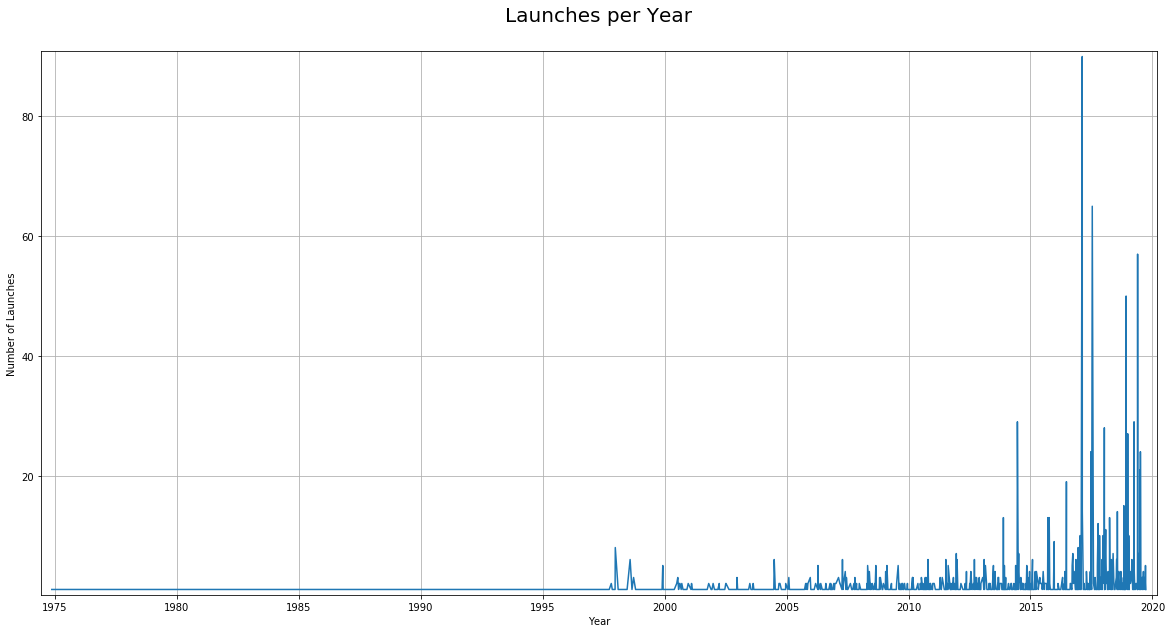

In [287]:
# graphs a little blurry, need to change
values = dates.values #values to plot
ddates = dates.index #put dates in order

fig, ax = plt.subplots(figsize=(20,10))
ax.grid()
plt.margins(.01)
plt.title('Launches per Year', fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.plot(ddates, values);

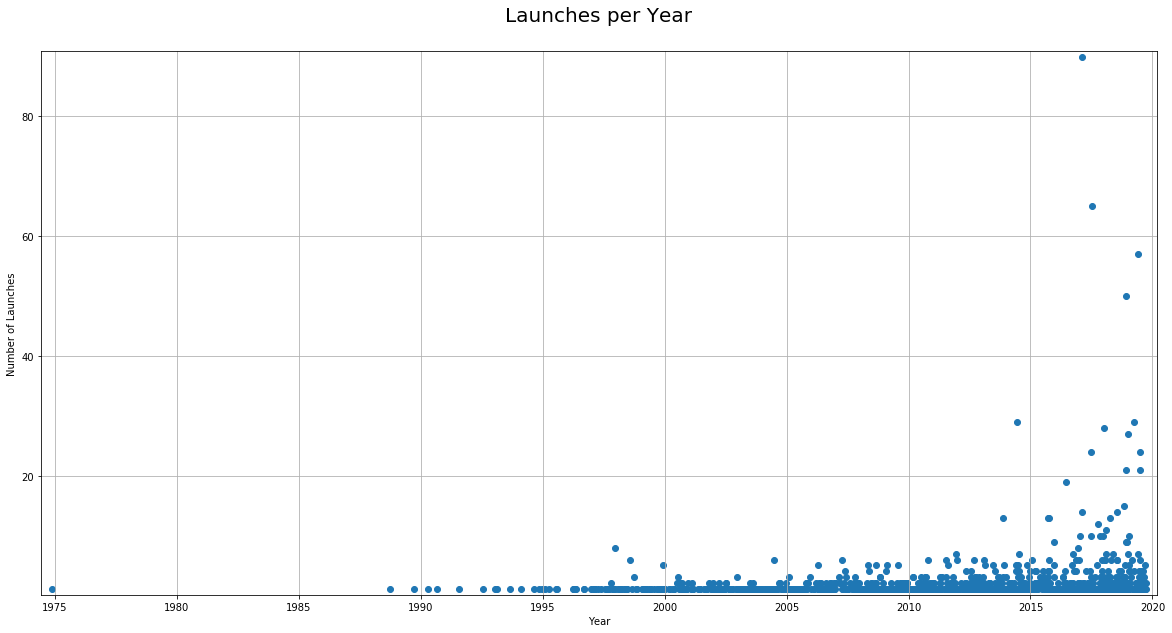

In [288]:
# same as above using scatter plot
fig, ax = plt.subplots(figsize=(20,10))
ax.grid()
plt.margins(.01)
plt.title('Launches per Year', fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.scatter( x=ddates, y=values);

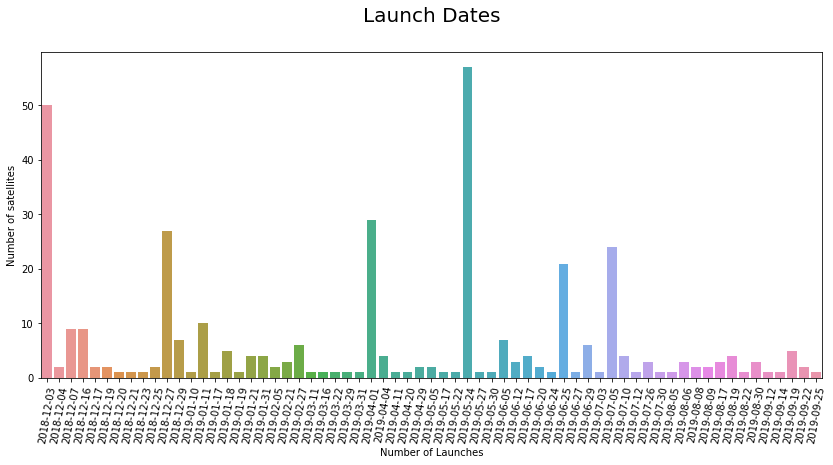

In [289]:
# more number of launches during beginning and end of the months
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(df['Date of Launch'], order = df['Date of Launch'].value_counts().sort_index().tail(65).index)
plt.xticks(rotation=80)
plt.title("Launch Dates", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Number of Launches")
plt.ylabel("Number of satellites")
plt.show()

In [290]:
df['Purpose'].value_counts()

Communications                                    829
Earth Observation                                 822
Technology Development                            273
Navigation/Global Positioning                     130
Space Science                                      81
Earth Science                                      15
Navigation/Regional Positioning                    12
Space Observation                                   9
Communications/Technology Development               8
Technology Demonstration                            8
Earth Observation/Technology Development            7
Communications/Maritime Tracking                    5
Earth Observation                                   4
Surveillance                                        3
Earth Observation/Communications                    2
Technology Development/Education                    2
Educational                                         1
Earth Science/Earth Observation                     1
Space Science/Technology Dev

Number of Purposes: 24


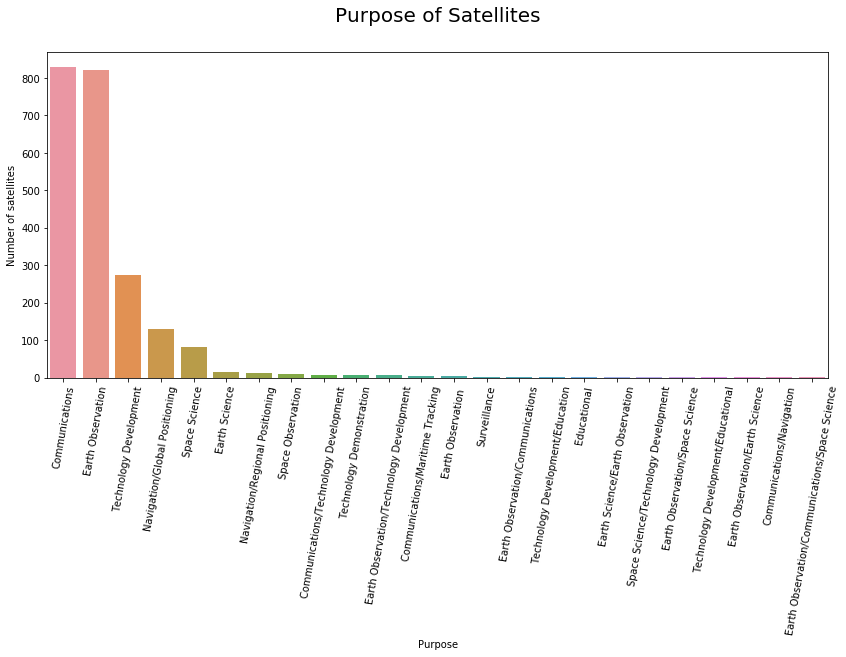

In [291]:
# purpose of satellites
print('Number of Purposes:',df['Purpose'].describe()[1])
fig, ax = plt.subplots(figsize=(14,6))
fig1=sns.countplot(df['Purpose'], order = df['Purpose'].value_counts().index)
plt.xticks(rotation=80)
plt.title("Purpose of Satellites", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Purpose")
plt.ylabel("Number of satellites")
plt.savefig('fig1.png')
plt.show()

In [292]:
# figure out what plot to use to graph 
# a lot of data to graph, would be too crowded
Satellite_Purpose = pd.crosstab(df['Name of Satellite, Alternate Names'], df['Purpose'])
Satellite_Purpose.head()

Purpose,Communications,Communications/Maritime Tracking,Communications/Navigation,Communications/Technology Development,Earth Observation,Earth Observation,Earth Observation/Communications,Earth Observation/Communications/Space Science,Earth Observation/Earth Science,Earth Observation/Space Science,Earth Observation/Technology Development,Earth Science,Earth Science/Earth Observation,Educational,Navigation/Global Positioning,Navigation/Regional Positioning,Space Observation,Space Science,Space Science/Technology Development,Surveillance,Technology Demonstration,Technology Development,Technology Development/Education,Technology Development/Educational
"Name of Satellite, Alternate Names",,,,,,,,,,,,,,,,,,,,,,,,
3Cat-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
AAUSat-4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"ABS-2 (Koreasat-8, ST-3)",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ABS-2A,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ABS-3A,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [293]:
Satellite_Purpose.sum()

Purpose
Communications                                    829
Communications/Maritime Tracking                    5
Communications/Navigation                           1
Communications/Technology Development               8
Earth Observation                                 822
Earth Observation                                   4
Earth Observation/Communications                    2
Earth Observation/Communications/Space Science      1
Earth Observation/Earth Science                     1
Earth Observation/Space Science                     1
Earth Observation/Technology Development            7
Earth Science                                      15
Earth Science/Earth Observation                     1
Educational                                         1
Navigation/Global Positioning                     130
Navigation/Regional Positioning                    12
Space Observation                                   9
Space Science                                      81
Space Science/Techno

In [294]:
user_purposes = df.groupby(['Country of Operator/Owner','Purpose'])['Users'].size()
user_purpose = pd.DataFrame(user_purposes)
user_purpose
                                        #took out top 21 countries using iloc to get all purposes for each country
                                        # only using top 5
user_purpose21 = user_purpose.iloc[[184,185,186,187,188,189,190,191,192,193,194,195,196, #USA 
                                    27,28,29,30,31,32,33,34,35, #China
                                    140,141,142,143,144,145,146,147, #Russia
                                    99,100,101,102,103, #Japan
                                    121,122,123,]] #Multinational
                                    # 211,212,213, #United Kingdom
                                    # 79,80,81,82,83,84, #India
                                    # 46,47,48,49,50,51, #ESA
                                    # 19,20,21,22,23,24,25, #Canada
                                    # 69,70,71,72,73,74,75,76, #Germany
                                    # 113,#Luxembourg
                                    # 167,168,169,170, #Spain
                                    # 161,162,163,164,165,166, #South Korea
                                    # 3,4,5,6, #Argentina
                                    # 150,151,152,153, #Saudi Arabia
                                    # 7,8, #Australia
                                    # 125,126, #Netherlands
                                    # 92,93,94, #Israel
                                    # 59,60,61,62, #France
                                    # 177, #Taiwan/USA
                                    # 95,96,97,98]] #Italy
user_purpose21


Users
Country of Operator/Owner Purpose                                              
USA                       Communications                                    381
                          Communications/Technology Development               3
                          Earth Observation                                 422
                          Earth Observation                                   2
                          Earth Observation/Technology Development            2
                          Earth Science                                       1
                          Educational                                         1
                          Navigation/Global Positioning                      33
                          Space Observation                                   5
                          Space Science                                      31
                          Surveillance                                        3
                          Technology Demonstration                            5
                          Technology Development                             99
China                     Communications                                     44
                          Earth Observation                                 154
                          Earth Observation                                   1
                          Earth Observation/Communications                    1
                          Earth Observation/Technology Development            1
                          Earth Science                                       1
                          Navigation/Global Positioning                      44
                          Space Science                                      15
                          Technology Development                             59
Russia                    Communications                                     83
                          Earth Observation                                  26
                          Earth Observation/Communications/Space Science      1
                          Earth Science                                       2
                          Navigation/Global Positioning                      27
                          Space Observation                                   2
                          Space Science                                       6
                          Technology Development                             14
Japan                     Communications                                     19
                          Earth Observation                                  30
                          Navigation/Regional Positioning                     4
                          Space Science                                       3
                          Technology Development                             22
Multinational             Communications                                     48
                          Earth Observation                                   7
                          Space Science                                       9

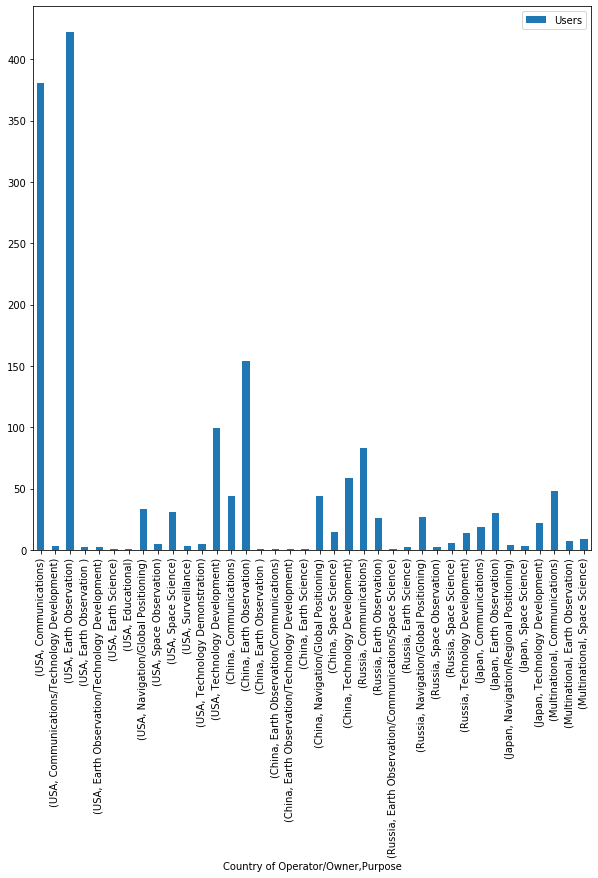

In [295]:
# need to give each country a different color to read easier
# will come back
user_purpose21.plot(kind='bar', figsize=(10,10));

Took top 5 countries and plotted their different satellite purposes.
Below are the top 5 in different graphs

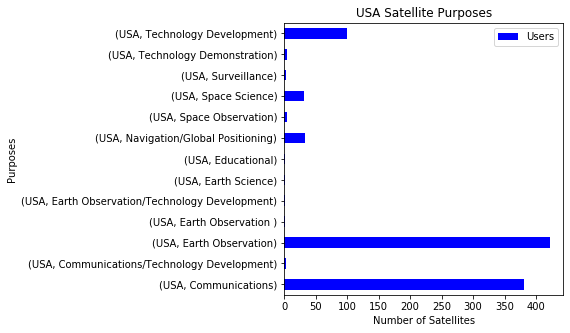

In [296]:
# USA's satellites purposes
# for now will plot them seperatly
USA_purpose = user_purpose.iloc[[184,185,186,187,188,189,190,191,192,193,194,195,196]].plot(kind='barh', color='b', figsize=(5,5))
plt.title('USA Satellite Purposes')
plt.xlabel('Number of Satellites')
plt.ylabel('Purposes');
plt.savefig('USA_purpose.png')

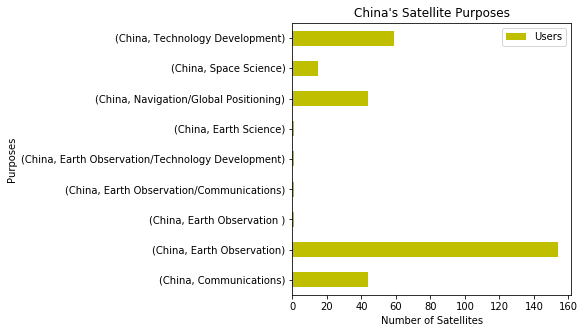

In [297]:
# China's Satellites purposes
China_purpose = user_purpose.iloc[[27,28,29,30,31,32,33,34,35]].plot(kind='barh', color='y', figsize=(5,5))
plt.title("China's Satellite Purposes")
plt.xlabel('Number of Satellites')
plt.ylabel('Purposes');
plt.savefig('China_purpose.png')

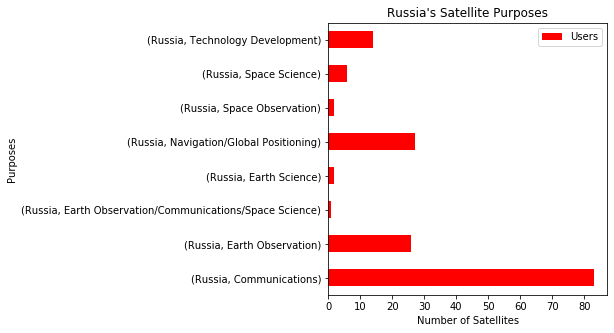

In [298]:
# Russia's Satellites purposes
Russia_purpose = user_purpose.iloc[[140,141,142,143,144,145,146,147]].plot(kind='barh', color='r', figsize=(5,5))
plt.title("Russia's Satellite Purposes")
plt.xlabel('Number of Satellites')
plt.ylabel('Purposes');
plt.savefig('Russia_purpose.png')

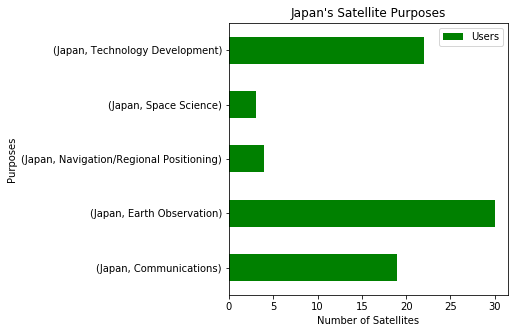

In [299]:
# Japan's Satellites purposes
Japan_purpose = user_purpose.iloc[[99,100,101,102,103]].plot(kind='barh',color='g', figsize=(5,5))
plt.title("Japan's Satellite Purposes")
plt.xlabel('Number of Satellites')
plt.ylabel('Purposes');
plt.savefig('Japan_purpose.png')

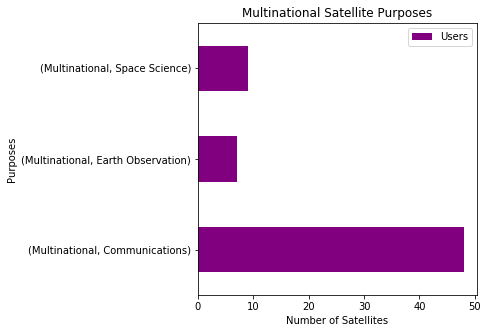

In [300]:
# Multinational's Satellites purposes
Multi_purpose = user_purpose.iloc[[121,122,123]].plot(kind='barh',color='purple', figsize=(5,5))
plt.title("Multinational Satellite Purposes")
plt.xlabel('Number of Satellites')
plt.ylabel('Purposes');
plt.savefig('Multi_purpose.png')